In [1]:
from tensorflow.python.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 25s 0us/step


In [9]:
print('x_train.shape : ', x_train.shape)
print('x_test.shape : ', x_test.shape)
print('y_train.shape : ', y_train.shape)
print('y_test.shape : ', y_test.shape)

x_train.shape :  (50000, 32, 32, 3)
x_test.shape :  (10000, 32, 32, 3)
y_train.shape :  (50000, 10)
y_test.shape :  (10000, 10)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


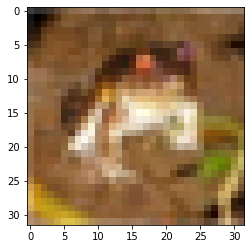

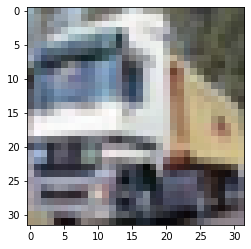

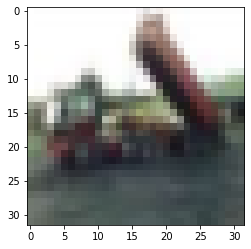

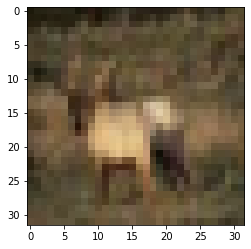

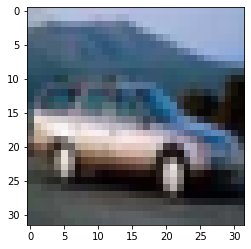

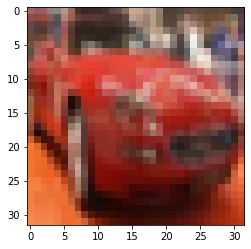

In [17]:
import matplotlib.pyplot as plt
print(y_train)
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[1])
plt.show()
plt.imshow(x_train[2])
plt.show()
plt.imshow(x_train[3])
plt.show()
plt.imshow(x_train[4])
plt.show()
plt.imshow(x_train[5])
plt.show()

In [6]:
from tensorflow.python.keras.utils import to_categorical

x_train = x_train/255.
x_test = x_test/255.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [18]:
from tensorflow.python.keras.models import Sequential

model = Sequential()


In [20]:
from tensorflow.python.keras.layers import Conv2D

model.add(
    Conv2D(
        filters=32, input_shape=(32,32,3), kernel_size=(3,3), padding='same', activation='relu'
    )
)
model.add(
    Conv2D(
        filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'
    )
)


In [22]:
from tensorflow.python.keras.layers import MaxPooling2D

model.add(MaxPooling2D(pool_size=(2,2)))

In [23]:
from tensorflow.python.keras.layers import Dropout

model.add(Dropout(0.25))

In [24]:
model.add(
    Conv2D(
        filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'
    )
)
model.add(
    Conv2D(
        filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'
    )
)
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [25]:
model.output_shape

(None, 8, 8, 64)

In [26]:
from tensorflow.python.keras.layers import Flatten

model.add(Flatten())
model.output_shape

(None, 4096)

In [27]:
from tensorflow.python.keras.layers import Dense

model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax'))

In [ ]:
from tensorflow.python.keras.callbacks import TensorBoard

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
tsb = TensorBoard(log dir='./logs')
